In [1]:
from sklearn import datasets

In [15]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import  matplotlib.pyplot as plt

In [3]:
x_data,y_data = datasets.make_classification(n_samples=200,
                                            n_features=2,
                                            n_informative=2,
                                            n_redundant=0,
                                            n_classes=2,
                                            n_clusters_per_class=1)

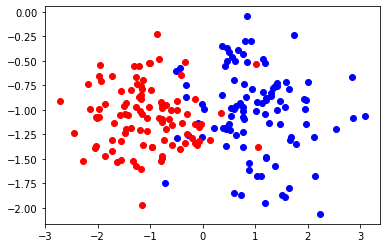

In [4]:
x_class0 = x_data[y_data==0]
x_class1 = x_data[y_data==1]

plt.scatter(x_class0[:,0],x_class0[:,1],marker='o',c='b')
plt.scatter(x_class1[:,0],x_class1[:,1],marker='o',c='r')
plt.show()

In [5]:
y_data = y_data.reshape(-1,1)

In [6]:
y_data.shape

(200, 1)

划分数据集

In [7]:
X_train,X_test, y_train, y_test = train_test_split(x_data,y_data,test_size = 0.3)

In [8]:
X_train.shape

(140, 2)

In [9]:
y_train.shape

(140, 1)

In [10]:
n_input = X_train.shape[1]
n_output = y_train.shape[1]

In [11]:
x = tf.placeholder(tf.float32,shape=(None,n_input),name="x")
y = tf.placeholder(tf.float32,shape=(None,n_output),name="y")

In [12]:
w = tf.Variable(np.zeros((n_input,n_output)),dtype = tf.float32,name="w")
b = tf.Variable(np.zeros((n_output)),dtype = tf.float32,name="b")

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
y_hat = tf.matmul(x,w)+b

In [14]:
y_tag = tf.sigmoid(y_hat)

In [18]:
m = X_train.shape[0]

In [16]:
cost1 = -(tf.matmul(tf.transpose(y),tf.log(y_tag))+(tf.matmul(tf.transpose(1-y),tf.log(1-y_tag))))

In [19]:
cost2 = 1/m*cost1

In [24]:
gradience = tf.train.GradientDescentOptimizer(0.01).minimize(cost2)

In [27]:
cost = -tf.reduce_mean(y*tf.log(y_hat)+(1-y)*tf.log(1-y_hat))

In [21]:
num_epochs = 100
cost_epochs = []
w_hat = 0
b_hat = 0

In [25]:
with tf.Session() as tfs:
    tfs.run(tf.global_variables_initializer())
    for epoch in range(num_epochs):
        tfs.run(gradience,feed_dict={x:X_train,y:y_train})
        cost_val = tfs.run(cost2,feed_dict={x:X_train,y:y_train})
        cost_epochs.append(cost_val)
    w_hat,b_hat = tfs.run([w,b])
    test_cost = tfs.run(cost1/X_test.shape[0],feed_dict={x:X_test,y:y_test})

In [26]:
test_cost

array([[0.5199245]], dtype=float32)

In [87]:
plt.figure(figsize =(12,6))
x_plot = np.array([[np.min(x_data)-1],[np.max(x_data)+1]])
y_plot = np.matmul(x_plot,w_hat)+b_hat
plt.plot(x_data,y_data,"b.")
plt.plot(x_plot,y_plot,"r")
plt.show()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 1)

<Figure size 864x432 with 0 Axes>

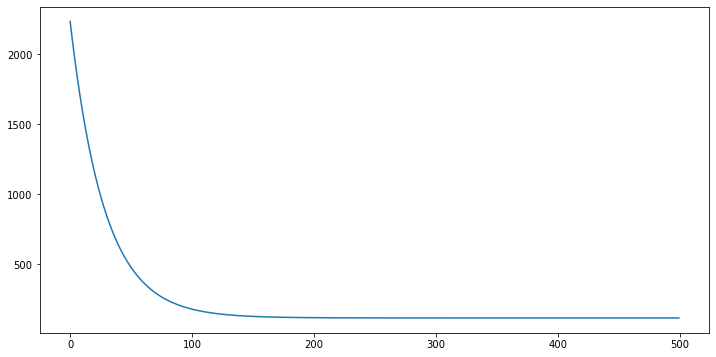

In [39]:
plt.figure(figsize=(12,6))
plt.plot(cost_epochs)
plt.show()